In [1]:
push!(LOAD_PATH, "/home/ctroupin/Projects/Altimetry-Interpolation/julia")
using DivandAltimetry
using PyPlot
using Base.Test

┌ Info: Precompiling DivandAltimetry [top-level]
└ @ Base loading.jl:1242


UndefVarError: UndefVarError: Test not defined

In [4]:
datadir = "/home/ctroupin/Projects/Altimetry-Interpolation/data/AVISO/"
datafile = joinpath(datadir, "dt_med_al_sla_vxxc_20140101_20140829.nc")
filelist = [joinpath(datadir, f) for f in readdir(datadir)];
griddir = "/home/ctroupin/Data/AVISO/Gridded/2014"
gridfile = joinpath(griddir, "dt_med_allsat_msla_h_20140319_20140829.nc")

"/home/ctroupin/Data/AVISO/Gridded/2014/dt_med_allsat_msla_h_20140319_20140829.nc"

In [5]:
@test DivandAltimetry.shiftlon(187.2) == -172.8

Test Passed

In [6]:
obsval,obslon,obslat,obsdepth,obstime = DivandAltimetry.loadaviso_alongtrack(datafile);
@test length(obsval) == 394
@test obsval[1] ≈ 0.1420000

Test Passed

In [10]:
@test_throws MethodError DivandAltimetry.loadaviso_alongtrack(1);

In [16]:
# Load from a list of files
obsval,obslon,obslat,obsdepth,obstime = DivandAltimetry.loadaviso_alongtrack(filelist);
@test obsval[end] == 0.179
@test length(obsval) == 112312

Test Passed

In [20]:
obsval,obslon,obslat,obsdepth,obstime = DivandAltimetry.loadaviso_alongtrack([]);
@test obslat === nothing
@test obsval === nothing

Test Passed

In [22]:
# Read the grid
gridval,griderr,gridlon,gridlat,gridtime = DivandAltimetry.loadaviso_gridded(gridfile);

In [28]:
mm = mean(griderr)

missing

In [29]:
@test length(gridval) == 44032
@test griderr[2] === mm

Test Passed

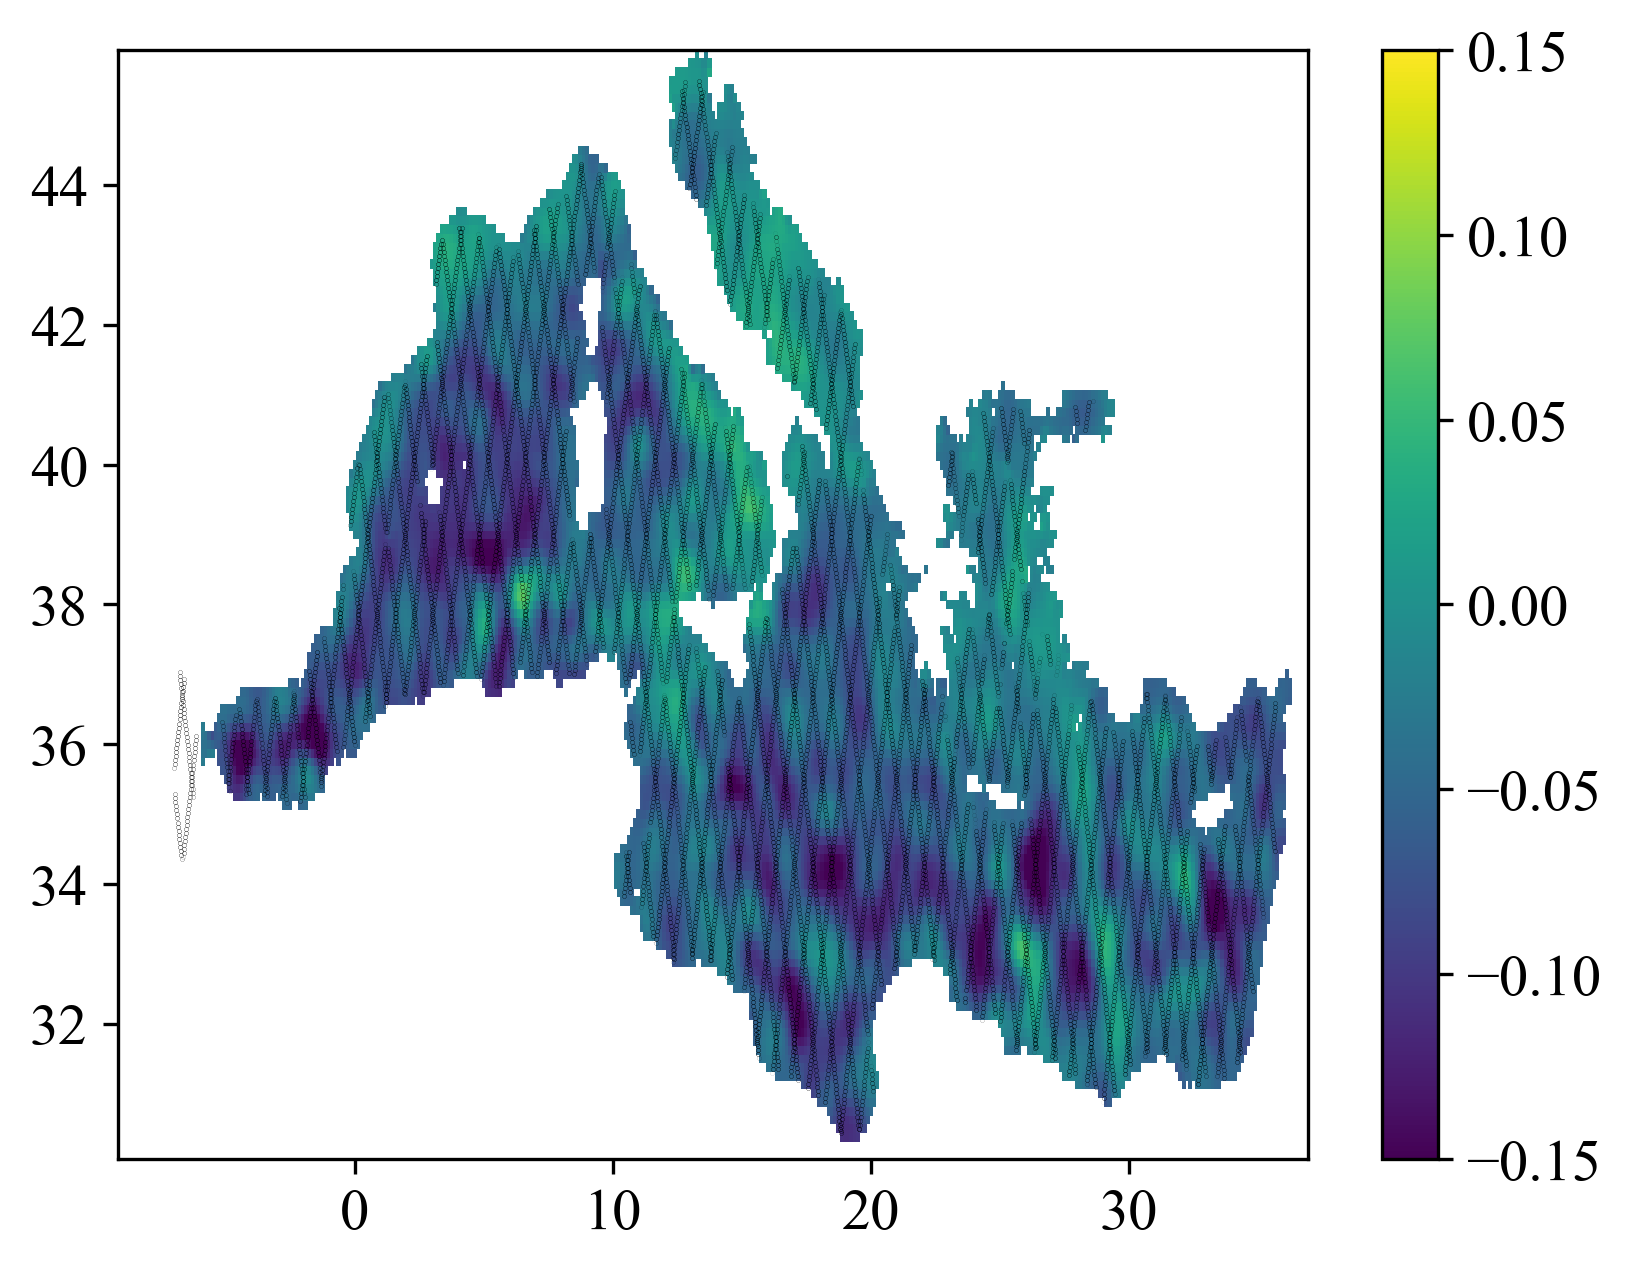

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbb69fd61d0>

In [21]:
field2plot = gridval;
mm = mean(gridval);
mask = (gridval[:,:,1] .=== mm);
field2plot[mask] = NaN;
pcolormesh(gridlon, gridlat, field2plot', vmin=-0.15, vmax=0.15);
colorbar()
plot(obslon, obslat, "ko", markersize=.01)

In [32]:
r = DivandAltimetry.get_aspect_ratio(gridlon);
@test r == -0.01783763171491169

Test Passed

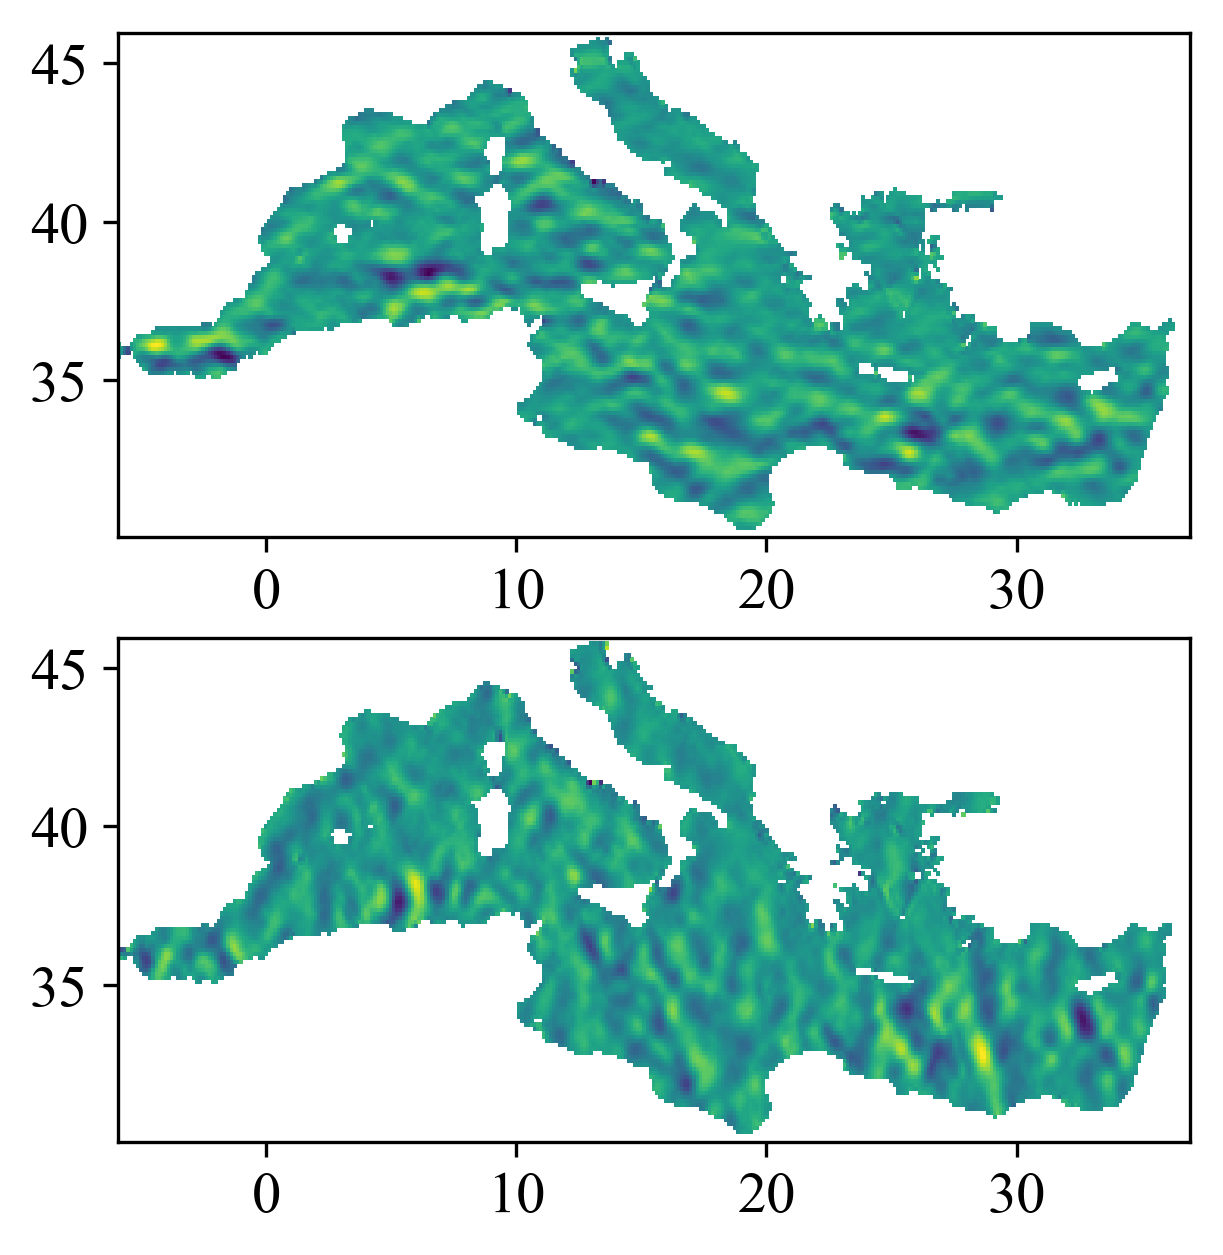

In [41]:
ratio = get_aspect_ratio(gridlat);
gradX, gradY = gradient2D(field2plot);
subplot(2,1,1)
pcolormesh(gridlon, gridlat, gradX')
gca()[:set_aspect](ratio)
subplot(2,1,2)
pcolormesh(gridlon, gridlat, gradY')
gca()[:set_aspect](ratio)